Best Parameters: {'var_smoothing': 1e-05}
Accuracy: 0.9099099099099099
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1200
           1       1.00      0.76      0.87      1122
           2       0.80      0.96      0.88      1119

    accuracy                           0.91      3441
   macro avg       0.92      0.91      0.91      3441
weighted avg       0.92      0.91      0.91      3441

Confusion Matrix:
[[1196    0    4]
 [   6  857  259]
 [  41    0 1078]]


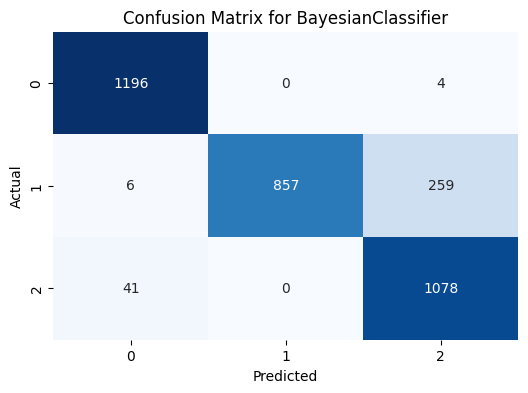

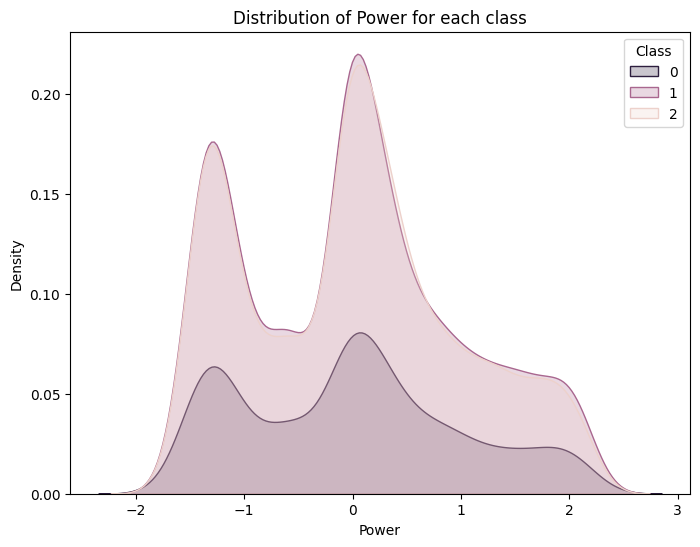

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


dfe = pd.read_csv("dataset/resampled-train.csv")


X_resampled = dfe[['ODO', 'Year', 'Age', 'Mileage', 'Engine', 'Power', 'Seats', 'Fuel_Diesel', 'Fuel_Petrol', 'Transmission_Automatic', 'Transmission_Manual', 'Owner_First', 'Owner_Fourth & Above', 'Owner_Second', 'Owner_Third']]
y_resampled = dfe['Price_Category']



X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}


classifier = GaussianNB()


grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("Classification Report:")
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for BayesianClassifier')
plt.show()

feature_names = ['ODO', 'Year', 'Age', 'Mileage', 'Engine', 'Power', 'Seats','Fuel_Diesel', 'Fuel_Petrol', 'Transmission_Automatic','Transmission_Manual', 'Owner_First', 'Owner_Fourth & Above','Owner_Second', 'Owner_Third']
df = pd.DataFrame(X_train_scaled, columns=feature_names)
df['Label'] = y_train  

visualize = 'Power'

plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x=visualize, hue='Label',  fill=True)
plt.title(f'Distribution of {visualize} for each class')
plt.xlabel(visualize)
plt.legend(title='Class', labels='012')
plt.show()